# Data loading and visualizations

Here, we load in the data and check for bad entries and outliers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
merged_df = pd.read_csv('data/cleaned/merged_df.csv')
target = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2010 to 2019,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,...,Income in the past 12 months at or above poverty level 18 to 64 years,Income in the past 12 months at or above poverty level 65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.002938,0.101283,0.216177,0.215929,0.098386,0.178486,0.116922,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.003622,0.135008,0.272086,0.234956,0.152805,0.090183,0.051099,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.036856,0.093512,0.218651,0.164395,0.150081,0.124882,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.068679,0.148341,0.203817,0.160435,0.156774,0.110618,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.000897,0.055123,0.194194,0.226077,0.143026,0.148612,0.093774,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 86)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


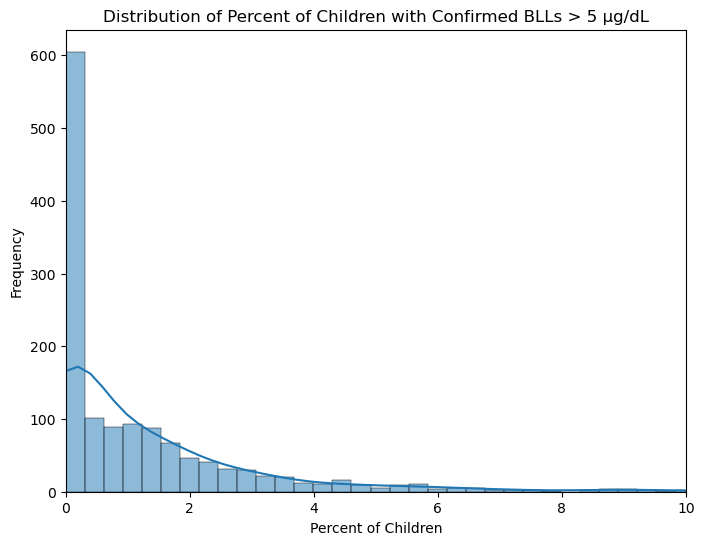

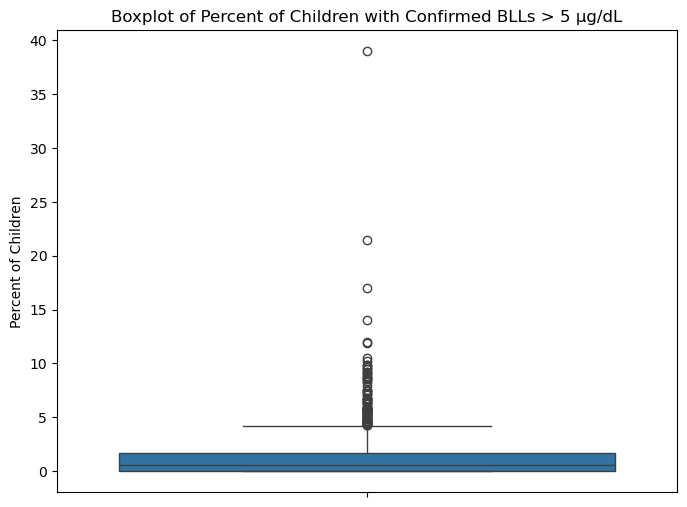

In [19]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.xlabel('Percent of Children')
plt.xlim(0,10)
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

In [20]:
merged_df.sort_values('Percent of Children with Confirmed BLLs ³5 µg/dL',ascending=False).head(10) #Check for outliers on the high end.

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2010 to 2019,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,...,Income in the past 12 months at or above poverty level 18 to 64 years,Income in the past 12 months at or above poverty level 65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
1227,NC,UNKNOWN,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.1,11.4,46.2,64.5,78.8,81.5
1983,ND,ADAMS,21.45,0.000000,0.080206,0.014717,0.055923,0.113319,0.212656,0.079470,...,NaN,NaN,46.0968,-102.5284,9.0,8.3,50.7,64.0,78.0,86.4
1865,TX,MORRIS,17.02,0.000000,0.034181,0.085709,0.133975,0.116627,0.204397,0.179492,...,NaN,NaN,33.1135,-94.7326,10.1,8.8,40.5,71.8,78.4,80.9
1982,ND,SARGENT,14.06,0.000000,0.092954,0.078961,0.149425,0.094453,0.158421,0.088956,...,NaN,NaN,46.1078,-97.6306,9.0,8.3,50.7,64.0,78.0,86.4
947,MO,IRON,12.00,0.000000,0.041544,0.074276,0.122325,0.192195,0.178766,0.108687,...,NaN,NaN,37.5552,-90.7734,10.9,10.3,45.2,62.8,70.2,79.9
1981,ND,BARNES,11.89,0.000000,0.084663,0.035057,0.078352,0.090272,0.198948,0.085714,...,NaN,NaN,46.9361,-98.0716,9.0,8.3,50.7,64.0,78.0,86.4
1694,TX,ANDERSON,10.47,0.000994,0.073938,0.170484,0.129391,0.199901,0.153640,0.093615,...,0.486404,0.167935,31.8133,-95.6525,10.1,8.8,40.5,71.8,78.4,80.9
1081,NY,FULTON,10.20,0.000284,0.028521,0.056119,0.069528,0.087797,0.104221,0.090458,...,0.531491,0.184671,43.1138,-74.4222,7.2,6.0,45.5,54.8,70.5,81.6
533,IA,WAYNE,9.90,0.003614,0.071945,0.069317,0.086728,0.061761,0.149803,0.074573,...,NaN,NaN,40.7395,-93.3274,10.5,9.8,50.9,65.4,78.3,87.8
1980,ND,GRIGGS,9.83,0.000000,0.031019,0.026588,0.051699,0.043575,0.136632,0.170606,...,NaN,NaN,47.4573,-98.2370,9.0,8.3,50.7,64.0,78.0,86.4


In [21]:
merged_df.sort_values('Percent of Children with Confirmed BLLs ³5 µg/dL',ascending=True).head(10) #Check for outliers on the low end.

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2010 to 2019,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,...,Income in the past 12 months at or above poverty level 18 to 64 years,Income in the past 12 months at or above poverty level 65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
1813,TX,JACKSON,0.0,0.000000,0.071161,0.099539,0.099827,0.177615,0.131086,0.106309,...,NaN,NaN,28.9542,-96.5776,10.1,8.8,40.5,71.8,78.4,80.9
1773,TX,FRANKLIN,0.0,0.000580,0.086024,0.173400,0.216895,0.190025,0.129132,0.075198,...,NaN,NaN,33.1755,-95.2184,10.1,8.8,40.5,71.8,78.4,80.9
1780,TX,GLASSCOCK,0.0,0.000000,0.074144,0.112167,0.133080,0.087452,0.165399,0.205323,...,NaN,NaN,31.8695,-101.5208,10.1,8.8,40.5,71.8,78.4,80.9
1790,TX,HAMILTON,0.0,0.000000,0.047215,0.126977,0.071969,0.091222,0.180151,0.103828,...,NaN,NaN,31.7048,-98.1107,10.1,8.8,40.5,71.8,78.4,80.9
1791,TX,HANSFORD,0.0,0.000000,0.020105,0.047203,0.035839,0.101399,0.208479,0.251311,...,NaN,NaN,36.2774,-101.3546,10.1,8.8,40.5,71.8,78.4,80.9
1792,TX,HARDEMAN,0.0,0.000000,0.030269,0.041480,0.066143,0.096973,0.122197,0.177691,...,NaN,NaN,34.2902,-99.7457,10.1,8.8,40.5,71.8,78.4,80.9
1796,TX,HARTLEY,0.0,0.000000,0.028468,0.100414,0.212733,0.171843,0.203416,0.072464,...,NaN,NaN,35.8400,-102.6029,10.1,8.8,40.5,71.8,78.4,80.9
1799,TX,HEMPHILL,0.0,0.000000,0.101981,0.117133,0.053030,0.205711,0.164336,0.052448,...,NaN,NaN,35.8376,-100.2706,10.1,8.8,40.5,71.8,78.4,80.9
1811,TX,IRION,0.0,0.000000,0.021277,0.059102,0.183215,0.213948,0.056738,0.159574,...,NaN,NaN,31.3039,-100.9824,10.1,8.8,40.5,71.8,78.4,80.9
810,MI,SCHOOLCRAFT,0.0,0.000499,0.034282,0.137960,0.183225,0.122150,0.123481,0.093526,...,NaN,NaN,46.1966,-86.1996,10.6,9.7,44.8,63.4,77.0,85.5


In [22]:
#Check how many rows are missing a significant number of features.
empty_features = pd.DataFrame(merged_df.isna().sum(1),columns=['missing'])
empty_features.loc[empty_features['missing']>30]

,missing
5,38
11,38
13,38
14,37
17,38
...,...
2123,37
2124,37
2126,37
2129,37


We have found a few counties labeled as "unknown," as well as a few counties with abnormally high values for the target. We remove those from our dataset before proceeding.

In [23]:
# Get indices of outliers
#unknown_indices = merged_df[merged_df['County']=='UNKNOWN'].index
outlier_indices = merged_df[merged_df[target]>10.0].index
# Remove the outlier rows, store that result in filtered_df
filtered_df = merged_df.drop(index=outlier_indices)
filtered_df = filtered_df.drop(index=filtered_df[filtered_df['County']=='UNKNOWN'].index)

print(filtered_df.shape)


(2117, 86)


# Exploratory analysis

Here we briefly replicate our exploratory analysis, where we look for simple correlations between the data features.

Built 1939 or earlier                                           0.363901
lat                                                             0.214976
Educational services, and  health care and social assistance    0.177155
Built 1940 to 1949                                              0.176250
$80,000 to $89,999                                              0.165276
                                                                  ...   
Built 1980 to 1989                                             -0.227788
ADHD Percentage (Ever)                                         -0.228457
ADHD Percentage (Current)                                      -0.228848
Built 2000 to 2009                                             -0.273297
Built 1990 to 1999                                             -0.323392
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, Length: 83, dtype: float64


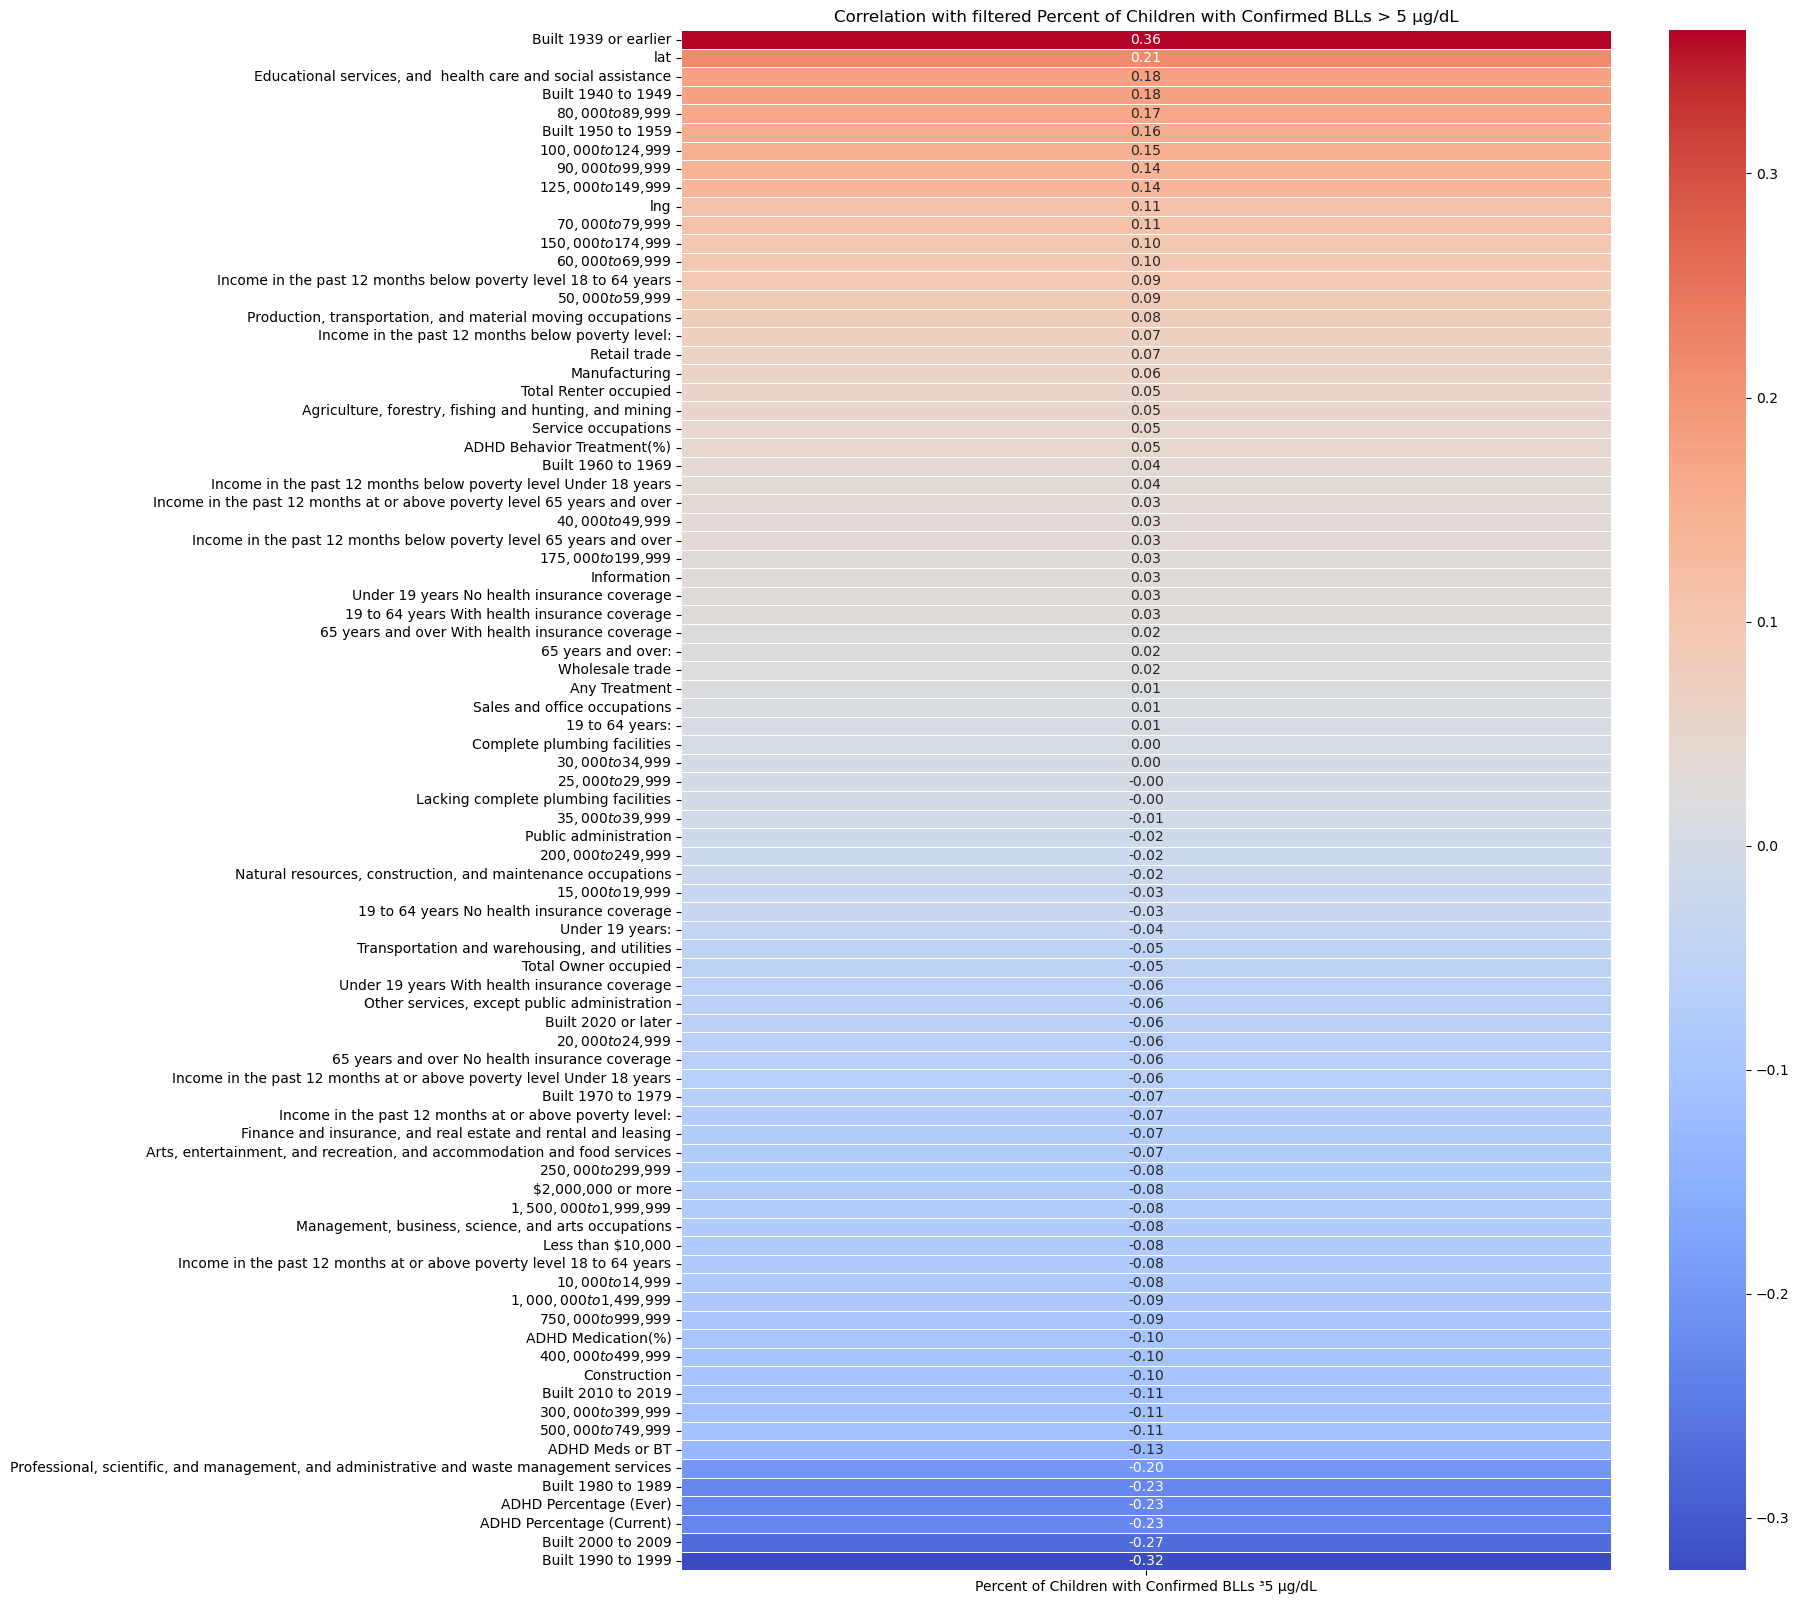

In [24]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ['State', 'County']
correlation_filtered_df = filtered_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = correlation_filtered_df.corr().drop('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with filtered Percent of Children with Confirmed BLLs > 5 µg/dL")
plt.show()

In [25]:
# Determine number of missing values in filtered_df
missing_percentage = filtered_df[bll_column].isnull().sum() / len(filtered_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.55%


# Feature engineering

In order to improve efficiency, we remove those columns that we believe a priori are irrelevant or which our exploratory analysis shows are irrelevant.

In [26]:
# Set a correlation threshold to remove features
corr_threshold = 0.02

# Use the previously calculated correlation_with_bll
# Get features with low correlation
low_corr_features = correlation_with_bll[
    abs(correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL']) <= corr_threshold
].index.tolist()

# Print low_corr_features and their correlations for debugging
print("Low Correlation Features:")
for feature in low_corr_features:
    corr_value = correlation_with_bll.loc[feature, 'Percent of Children with Confirmed BLLs ³5 µg/dL']
    print(f"  {feature}: {corr_value}")

# Remove house price and rent price features and some more
cols_to_remove = list(set(low_corr_features + [ 
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $19,999',
    '$20,000 to $24,999',
    '$25,000 to $29,999',
    '$30,000 to $34,999',
    '$35,000 to $39,999',
    '$40,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $69,999',
    '$70,000 to $79,999',
    '$80,000 to $89,999',
    '$90,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $174,999',
    '$175,000 to $199,999',
    '$200,000 to $249,999',
    '$250,000 to $299,999',
    '$300,000 to $399,999',
    '$400,000 to $499,999',
    '$500,000 to $749,999',
    '$750,000 to $999,999',
    '$1,000,000 to $1,499,999',
    '$1,500,000 to $1,999,999',
    '$2,000,000 or more',
    
]))

# Print cols_to_remove to verify features being dropped
print("\nColumns to Remove:")
print(cols_to_remove)
print(f"The number of feature columns we removed is: {len(cols_to_remove)}")

Low Correlation Features:
  Complete plumbing facilities: 0.003056213696714884
  Lacking complete plumbing facilities: -0.003056213696714375
  $25,000 to $29,999: -0.00025575880273037645
  $30,000 to $34,999: 0.0007314796452007026
  $35,000 to $39,999: -0.014575953893290083
  $200,000 to $249,999: -0.0195296590716596
  19 to 64 years:: 0.008386030469595398
  Wholesale trade: 0.01931068862867869
  Public administration: -0.01690963531864789
  Sales and office occupations: 0.01058373275507061
  Any Treatment: 0.012417485494981943

Columns to Remove:
['$70,000 to $79,999', '$100,000 to $124,999', '19 to 64 years:', 'Any Treatment', '$30,000 to $34,999', '$175,000 to $199,999', '$20,000 to $24,999', '$40,000 to $49,999', '$400,000 to $499,999', 'Wholesale trade', '$25,000 to $29,999', '$1,500,000 to $1,999,999', '$60,000 to $69,999', '$80,000 to $89,999', '$300,000 to $399,999', '$1,000,000 to $1,499,999', 'Public administration', '$200,000 to $249,999', '$10,000 to $14,999', '$500,000 to 

In [27]:
# Drop the columns from filtered_df
filtered_df = filtered_df.drop(columns=cols_to_remove, errors="ignore")
print(filtered_df.shape)

(2117, 53)


In [28]:
# Count non-null values in the target column
non_null_count = filtered_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notna().sum()

# Print the count
print(f"Number of rows with non-null percent bll values: {non_null_count}")

Number of rows with non-null percent bll values: 1322


# Data splitting

We split the total dataset into 3 pieces. First, we separate out all counties for which we have no BLL data. Then, we perform our train-test-split, saving 20% of the data for the testing set.


In [29]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = filtered_df.drop(columns=['State', 'County'])
# Split data into training and prediction sets
df_train = new_df[filtered_df[bll_column].notnull()]
df_missing = new_df[filtered_df[bll_column].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=bll_column)
y_train = df_train[bll_column]
X_missing = df_missing.drop(columns=bll_column)

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_missing", X_missing.shape)

X_train shape: (1057, 50)
X_val shape: (265, 50)
y_train shape: (1057,)
y_val shape: (265,)
X_missing (795, 50)


## Imputation

Since there are a significant number of missing entries in our training set, we first impute those values.

In [30]:
# Imputation:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Identify columns with missing values in X_train (excluding target)
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Create and fit the imputer on X_train
imputer = IterativeImputer(max_iter=20, random_state=42)
imputer.fit(X_train[cols_with_missing])

# Transform X_train, X_val, and X_predict
X_train_imputed = imputer.transform(X_train[cols_with_missing])
X_val_imputed = imputer.transform(X_val[cols_with_missing])
X_missing_imputed = imputer.transform(X_missing[cols_with_missing])

# Update X_train, X_val, and X_predict with imputed values
X_train[cols_with_missing] = X_train_imputed
X_val[cols_with_missing] = X_val_imputed
X_missing[cols_with_missing] = X_missing_imputed

# Model Selection

Here we use cross validation to tune hyperparameters and select the best possible model. We focus on tree-based methods, and we specifically use random forest, extra trees, and XGBoost regressors. For each one, we can also get the feature importances.

## Model training with Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the scaled training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350; total time=   0.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=35

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
print('The best MSE was '+repr(-float(random_search.best_score_))+' which used parameters:\n '+repr(random_search.best_params_))

The best MSE was 1.8950216410771508 which used parameters:
 {'n_estimators': np.int64(450), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# Get feature importance
best_model_rf = random_search.best_estimator_
feature_importance_rf = best_model_rf.feature_importances_

# Create df for feature importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
})

# Sort by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_rf = feature_importance_rf_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_rf:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 9
Feature: Built 2000 to 2009, Index: 2
Feature: lng, Index: 43
Feature: lat, Index: 42
Feature: Built 1990 to 1999, Index: 3
Feature: ADHD Meds or BT, Index: 48
Feature: ADHD Percentage (Ever), Index: 44
Feature: ADHD Percentage (Current), Index: 45
Feature: ADHD Behavior Treatment(%), Index: 46
Feature: Built 2010 to 2019, Index: 1


## Model training with Extra Trees

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter grid

param_distributions = {
    'n_estimators': randint(200, 500), 
    'max_depth': randint(10, 30),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],  
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error'],
    'ccp_alpha': uniform(0.0, 0.05)  
}

# Create Extra Trees Regressor object
et_regressor = ExtraTreesRegressor()

# Create RandomizedSearchCV object
et_search = RandomizedSearchCV(
    estimator=et_regressor,
    param_distributions=param_distributions,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=100,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

# Fit the model to the scaled training data
et_search.fit(X_train, y_train)

best_et_model = et_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   1.0s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   1.0s
[CV] END bootstrap=True, ccp_alpha=0.004998745790900145, criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=457; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.004998745790900145, criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimator

In [32]:
print('The best MSE was '+repr(-float(et_search.best_score_))+' which used parameters:\n '+repr(et_search.best_params_))

The best MSE was 1.7863797002183919 which used parameters:
 {'bootstrap': False, 'ccp_alpha': np.float64(0.001215798321572692), 'criterion': 'squared_error', 'max_depth': 26, 'max_features': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 245}


## Model training with XGBoost

In [33]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=1, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7, 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0, 0.1, 1],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
print('The best MSE was '+repr(-float(random_search_xgb.best_score_))+' which used parameters:\n '+repr(random_search_xgb.best_params_))

The best MSE was 1.872246544551777 which used parameters:
 {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}


In [40]:
# Get feature importance
best_xgb_model = random_search_xgb.best_estimator_
feature_importance_xgb = best_xgb_model.feature_importances_

# Create df for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Sort by importance
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_xgb = feature_importance_xgb_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_xgb:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 9
Feature: ADHD Percentage (Current), Index: 46
Feature: ADHD Percentage (Ever), Index: 45
Feature: Built 1990 to 1999, Index: 3
Feature: ADHD Medication(%), Index: 48
Feature: ADHD Behavior Treatment(%), Index: 47
Feature: lat, Index: 43
Feature: ADHD Meds or BT, Index: 49
Feature: lng, Index: 44
Feature: Income in the past 12 months at or above poverty level 18 to 64 years, Index: 41


Based on the above results, we elect to proceed with the extra trees model.

# Visualization

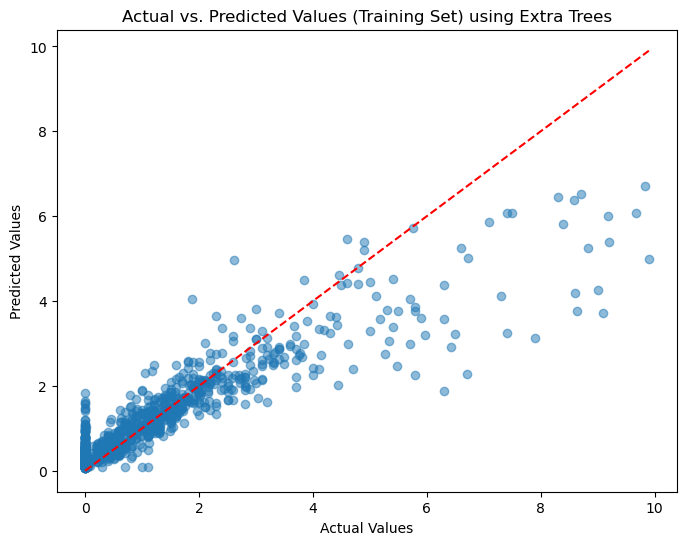

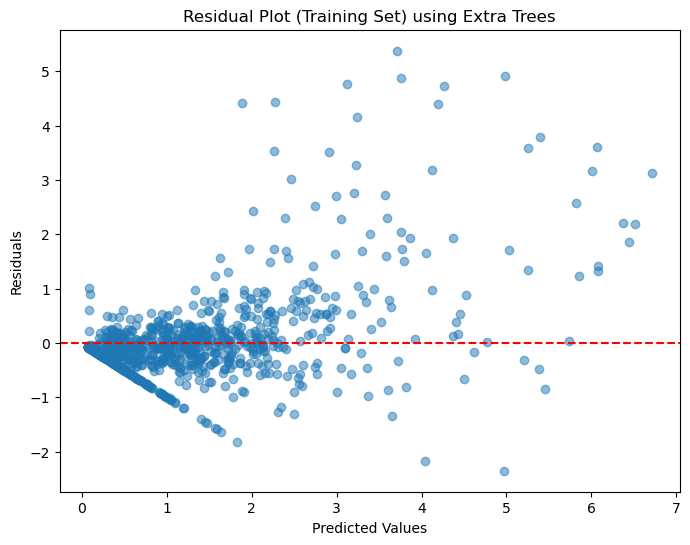

In [35]:
#First, let's look at the model's performance on the training data.

#best_et_model = et_search.best_estimator_
et_train_preds = best_et_model.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, et_train_preds, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Training Set) using Extra Trees")
#plt.savefig('./figures/et-train-plot.png')
plt.show()

residuals_train = y_train - et_train_preds

plt.figure(figsize=(8, 6))
plt.scatter(et_train_preds, residuals_train, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set) using Extra Trees")
#plt.savefig('./figures/et-train-residuals.png')
plt.show()

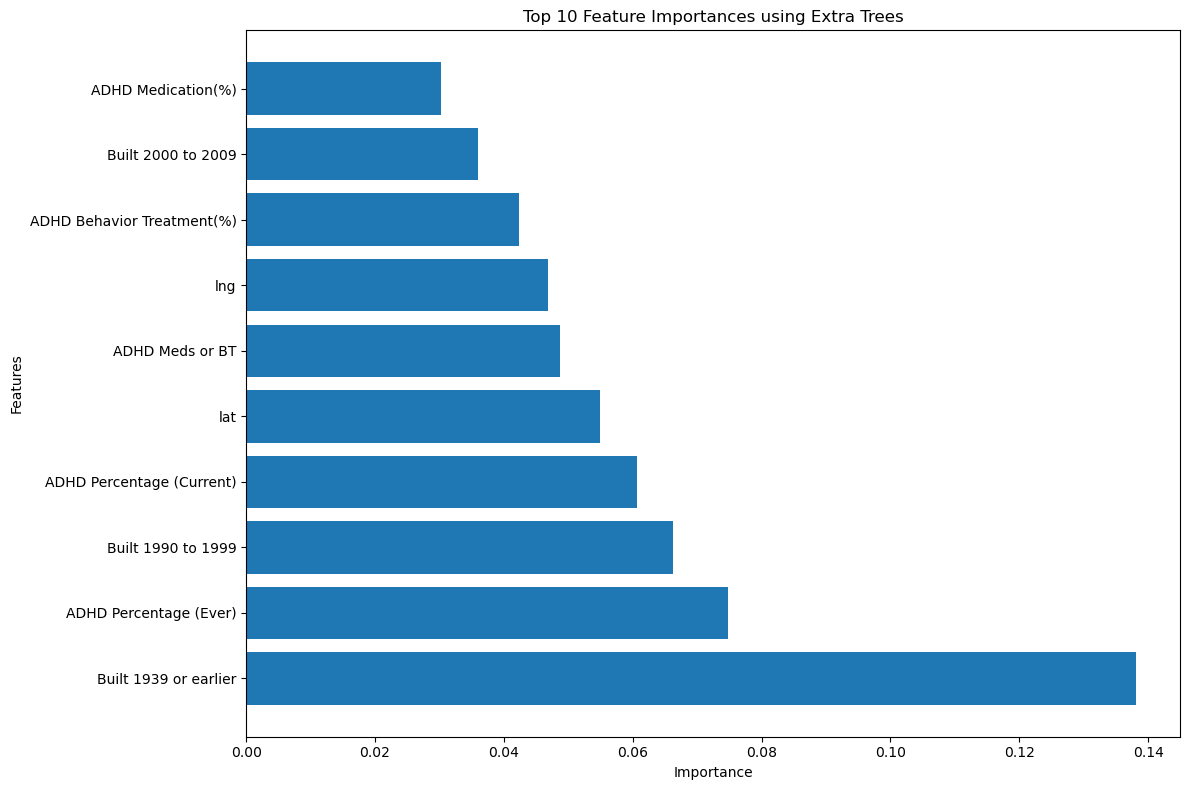

In [36]:
# Get feature importances
feature_importances = best_et_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train has the feature names
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_extra_trees_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_extra_trees_df.head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances using Extra Trees")
plt.tight_layout()
#plt.savefig('./figures/et-feature-importances.png')
plt.show()

# Applying our model to the test data.

In [37]:
# 3. Make predictions on the validation set
y_pred_extra_trees = best_et_model.predict(X_val)

# 4. Evaluate the model
mse_extra_trees = mean_squared_error(y_val, y_pred_extra_trees)
r2_extra_trees = r2_score(y_val, y_pred_extra_trees)
rmse_extra_trees = np.sqrt(mse_extra_trees)

print("Extra Trees Regression Results:")
print(f"  Root Mean Squared Error: {rmse_extra_trees}")
print(f"  R-squared: {r2_extra_trees}")

Extra Trees Regression Results:
  Root Mean Squared Error: 1.368013073170568
  R-squared: 0.4040767950869816


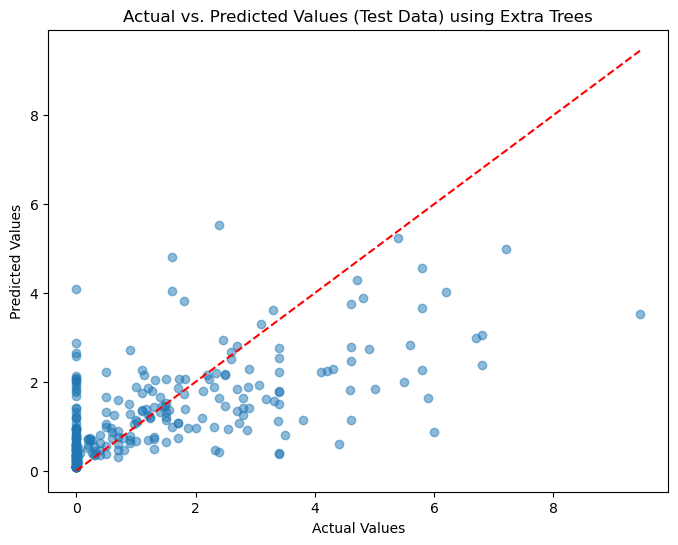

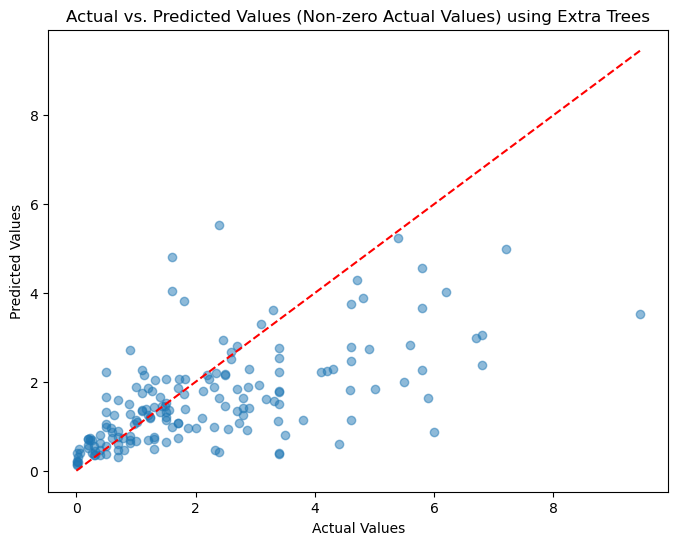

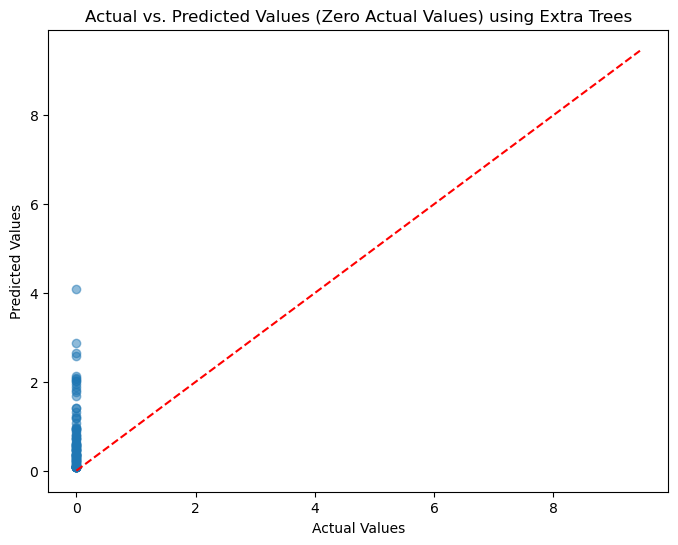

In [38]:
# Scatter plot of predicted versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_extra_trees, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data) using Extra Trees")
#plt.savefig('./figures/et-test-plot.png')
plt.show()

# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_extra_trees[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using Extra Trees")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_extra_trees[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using Extra Trees")
plt.show()

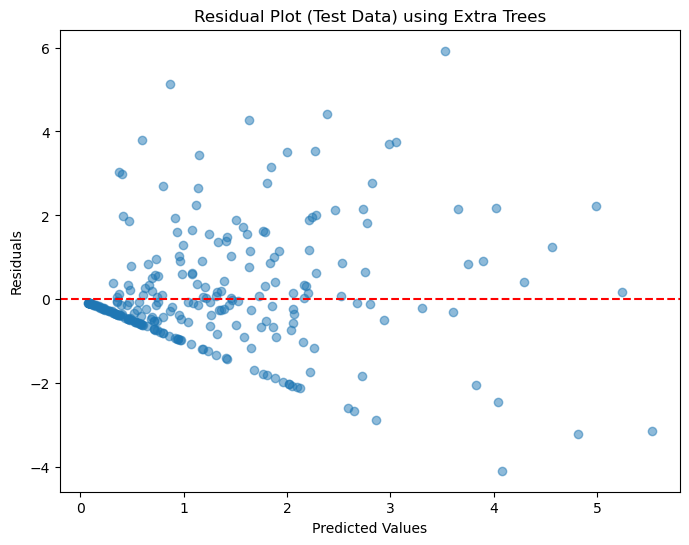

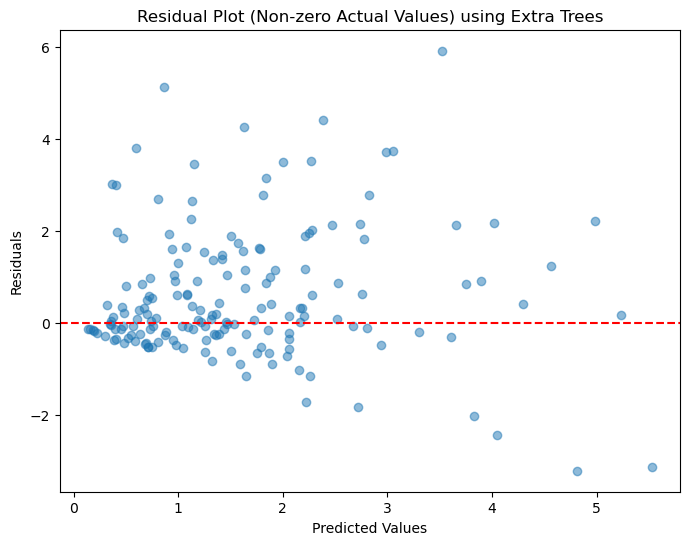

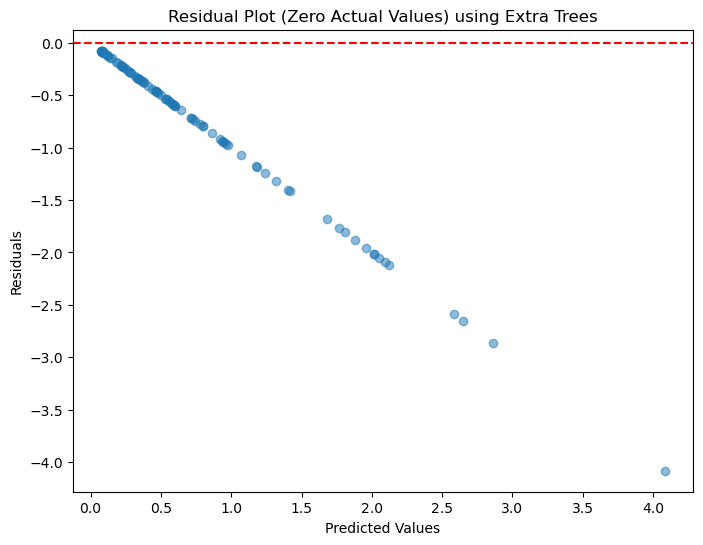

In [ ]:
# Residual Plot
residuals = y_val - y_pred_extra_trees

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data) using Extra Trees")
#plt.savefig('./figures/et-test-residuals.png')
plt.show()

# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_extra_trees[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using Extra Trees")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_extra_trees[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using Extra Trees")
plt.show()

This concludes the data analysis.